### 非线性的二分类问题
#### 要求
* 实现具有单个隐藏层的2类分类神经网络
* 隐藏层需要使用激活函数，例如tanh
* 计算交叉损失
* 实现向前和向后传播

#### 1. 获取数据集
获取数据集code已经有，不需要实现，数据有两个类别标签y=0，y=1的点组成，每个点有两个特征。建立一个模型来拟合这个数据。

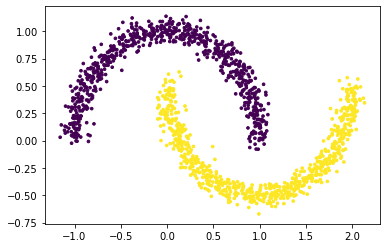

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

x,y = make_moons(n_samples=1500, shuffle=True,
                 noise=0.06, random_state=None)
plt.scatter(x[:,0], x[:,1], c=y, s=7)
plt.show()

In [2]:
train_X = x[:1200].T
test_X = x[1200:].T
train_Y = y[:1200].reshape(1,1200)
test_Y = y[1200:].reshape(1,300)

In [3]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(2, 1200) (2, 300) (1, 1200) (1, 300)


#### 2. 定义神经网络结构
网络输入输出以及隐藏层神经元个数

In [4]:
def layer_sizes(X,Y):
    #输入层大小
    n_x = X.shape[0]#隐层大小
    #输出层大小
    n_y = Y.shape[0]
    return n_x, n_y

#### 3. 初始化模型参数
随机初始化权重以及偏置为0

In [5]:
def initialize_parameters(n_x,n_h,n_y):
    """
    输入每层的神经元数量
    返回: 隐层、输出层的参数
    注：权重设定为正态分布矩阵*0.01 偏置设定为全0向量即可
    """
    ### 开始
    # 第一层
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    
    # 第二层
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 =np.zeros((n_y,1))
    
    ### 结束
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

#### 4.1 循环中的第一步:前向传播
隐藏层可以使用np.tanh(z)激活，输出层仍使用sigmoid激活

In [6]:
def sigmoid(x):
    '''
   计算sigmoid函数 
    '''
    # 开始
    s = 1/(1+np.exp(-x))
    # 结束
    return s

In [7]:
def forward_propagation(X, parameters):
    """
    输入：X(2*N)
    A2:最后一层的输出
    cache: 用于反向传播计算的存储中间计算结果Z1 A1 Z2 A2的字典
    """    
    # 获取参数
    ### 开始
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### 结束
    
    # 计算前向传播结果A2(即y_hat,即P(y=1|X))
    ### 开始
    # 第一层（hidden layer)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    # 第二层（output layer)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### 结束
    cache = {'Z1':Z1, 
            'A1':A1,
            'Z2':Z2,
            'A2':A2}
    return A2, cache

#### 4.2 循环中的第二步：计算损失

In [8]:
def compute_cost(A2,Y):
    """
    输入：最后一层输出，目标值
    输出：交叉熵损失
    """
    cost = np.mean(-Y*np.log(A2) - (1-Y)*np.log(1-A2))
    return cost

#### 4.3 循环中的第三步:反向传播
反向传播在这个网络中分为两步：第一次计算 dZ[2] dW[2] db[2] ，第二次计算 dZ[1] dW[1] db[1]。

In [9]:
def backward_propagation(parameters, cache,X,Y):
    """
    parameters:
    cache: 存储每层前向传播计算结果 Z1 A1 Z2 A2-Y
    
    X: 数据特征
    Y: 数据目标值
    
    return：每个参数的梯度
    """
    # 得出训练样本数量
    N = X.shape[1]
    
    # 获取参数和缓存中的输出
    ### 开始
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    ### 结束
    
    # 反向传播计算梯度
    ### 开始
    # output->hidden的梯度计算dZ[2] dW[2] db[2]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T)/N
    db2 = np.mean(dZ2, axis=1)
    db2 = db2.reshape(db2.shape[0],1)
    # hidden->input的梯度计算dZ[1] dW[1] db[1]
    dZ1 = np.dot(W2.T, dZ2) * (1-A1**2)
    dW1 = np.dot(dZ1,X.T)/N
    db1 = np.mean(dZ1, axis=1)
    db1 = db1.reshape(db1.shape[0],1)
    ### 结束
    
    grads={'dW1':dW1,
          'db1':db1,
          'dW2':dW2,
          'db2':db2}
    return grads

#### 4.4 循环中的第四步:更新梯度

In [10]:
def update_parameters(parameters, grads, learning_rate):
    """
    参数: 网络参数，梯度，学习率
    返回更新之后的参数
    """
    
    # 获取参数以及梯度
    ### 开始
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    ### 结束
    
    # 使用学习率更新参数
    ### 开始
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    ### 结束
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

#### 5.建立网络模型训练逻辑 

In [11]:
def nn_model(X,Y,n_h=4,learning_rate = 0.005, num_iterations = 1000):
    # 初始化参数
    ### 开始
    n_x, n_y = layer_sizes(X,Y)
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']   
    ### 结束
    
    # 循环
    for i in range(num_iterations):
        ### 开始
        # 前向传播
        A2, cache = forward_propagation(X, parameters)
        # 计算损失
        cost = compute_cost(A2,Y)
        # 反向传播计算梯度
        grads = backward_propagation(parameters, cache,X,Y)
        # 利用梯度更新参数
        parameters = update_parameters(parameters, grads, learning_rate)
        
        ### 结束
        if i % 50 == 0:
            print('迭代次数 %i:%f' %(i, cost))
    
    return parameters

#### 6. 预测结果

In [12]:
def predict(parameters, X):
    """
    利用训练好的参数和输入X
    此时X可以为训练集(样本内预测),也可以为测试集(样本外预测)
    return：预测结果
    """
    A2, _ = forward_propagation(X, parameters)
    Y_pre = np.where(A2>0.5, 1, 0)
    return Y_pre

In [13]:
# TEST
parameters = nn_model(train_X,train_Y,n_h=100,learning_rate = 0.1, num_iterations = 1000)

迭代次数 0:0.693206
迭代次数 50:0.660802
迭代次数 100:0.454417
迭代次数 150:0.331641
迭代次数 200:0.291558
迭代次数 250:0.270072
迭代次数 300:0.257771
迭代次数 350:0.251060
迭代次数 400:0.247502
迭代次数 450:0.245617
迭代次数 500:0.244607
迭代次数 550:0.244059
迭代次数 600:0.243758
迭代次数 650:0.243590
迭代次数 700:0.243496
迭代次数 750:0.243442
迭代次数 800:0.243410
迭代次数 850:0.243391
迭代次数 900:0.243379
迭代次数 950:0.243370


In [14]:
# 预测结果
Y_pre_train = predict(parameters, train_X)    
Y_pre_test = predict(parameters, test_X)    
# 打印准确率
print('--'*50)
print('训练集准确率%f'%(np.mean(Y_pre_train==train_Y)*100))
print('测试集准确率%f'%(np.mean(Y_pre_test==test_Y)*100))  

----------------------------------------------------------------------------------------------------
训练集准确率89.000000
测试集准确率88.000000
